In [ ]:
'''
8. CO2 Emissions Prediction
Dataset: https://raw.githubusercontent.com/selva86/datasets/master/CO2.csv
Task: Predict CO2 emissions of cars based on engine size and fuel consumption using
Linear Regression.

'''

In [1]:
import pandas as pd

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df['MODELYEAR'].unique()

array([2014], dtype=int64)

In [8]:
for i in range(df.shape[1]):
    print(f'Unique value of {df.columns[i]} is : ',df[df.columns[i]].unique(),'\n')

Unique value of MODELYEAR is :  [2014] 

Unique value of MAKE is :  ['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO'] 

Unique value of MODEL is :  ['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 'Q5' 'Q5 HYBRID' 'Q5 TDI CLEAN DIESEL' 'Q7' 'Q7 TDI CLEAN DIESEL' 'R8'
 'R8 SPYDER' 'RS5' 'RS5 CABRIOLET' 'RS7' 'S4' 'S5' 'S5 CABRIOLET' 'S6'
 'S7' 'S8' 'SQ5' 'TT COUPE QUATTRO' 'TT ROADSTE

In [11]:
df1 = df.drop(['MODEL','MODELYEAR'],axis=1)    

In [12]:
df1

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,VOLVO,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,VOLVO,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,VOLVO,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1067 non-null   object 
 1   VEHICLECLASS              1067 non-null   object 
 2   ENGINESIZE                1067 non-null   float64
 3   CYLINDERS                 1067 non-null   int64  
 4   TRANSMISSION              1067 non-null   object 
 5   FUELTYPE                  1067 non-null   object 
 6   FUELCONSUMPTION_CITY      1067 non-null   float64
 7   FUELCONSUMPTION_HWY       1067 non-null   float64
 8   FUELCONSUMPTION_COMB      1067 non-null   float64
 9   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 10  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 91.8+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [15]:
le = LabelEncoder()

In [17]:
df1[['VEHICLECLASS','TRANSMISSION']] = df1[['VEHICLECLASS','TRANSMISSION']].apply(le.fit_transform)

In [18]:
df1

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,0,2.0,4,10,Z,9.9,6.7,8.5,33,196
1,ACURA,0,2.4,4,20,Z,11.2,7.7,9.6,29,221
2,ACURA,0,1.5,4,17,Z,6.0,5.8,5.9,48,136
3,ACURA,11,3.5,6,11,Z,12.7,9.1,11.1,25,255
4,ACURA,11,3.5,6,11,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,11,3.0,6,11,X,13.4,9.8,11.8,24,271
1063,VOLVO,11,3.2,6,11,X,13.2,9.5,11.5,25,264
1064,VOLVO,11,3.0,6,11,X,13.4,9.8,11.8,24,271
1065,VOLVO,11,3.2,6,11,X,12.9,9.3,11.3,25,260


In [61]:
import seaborn as sns

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

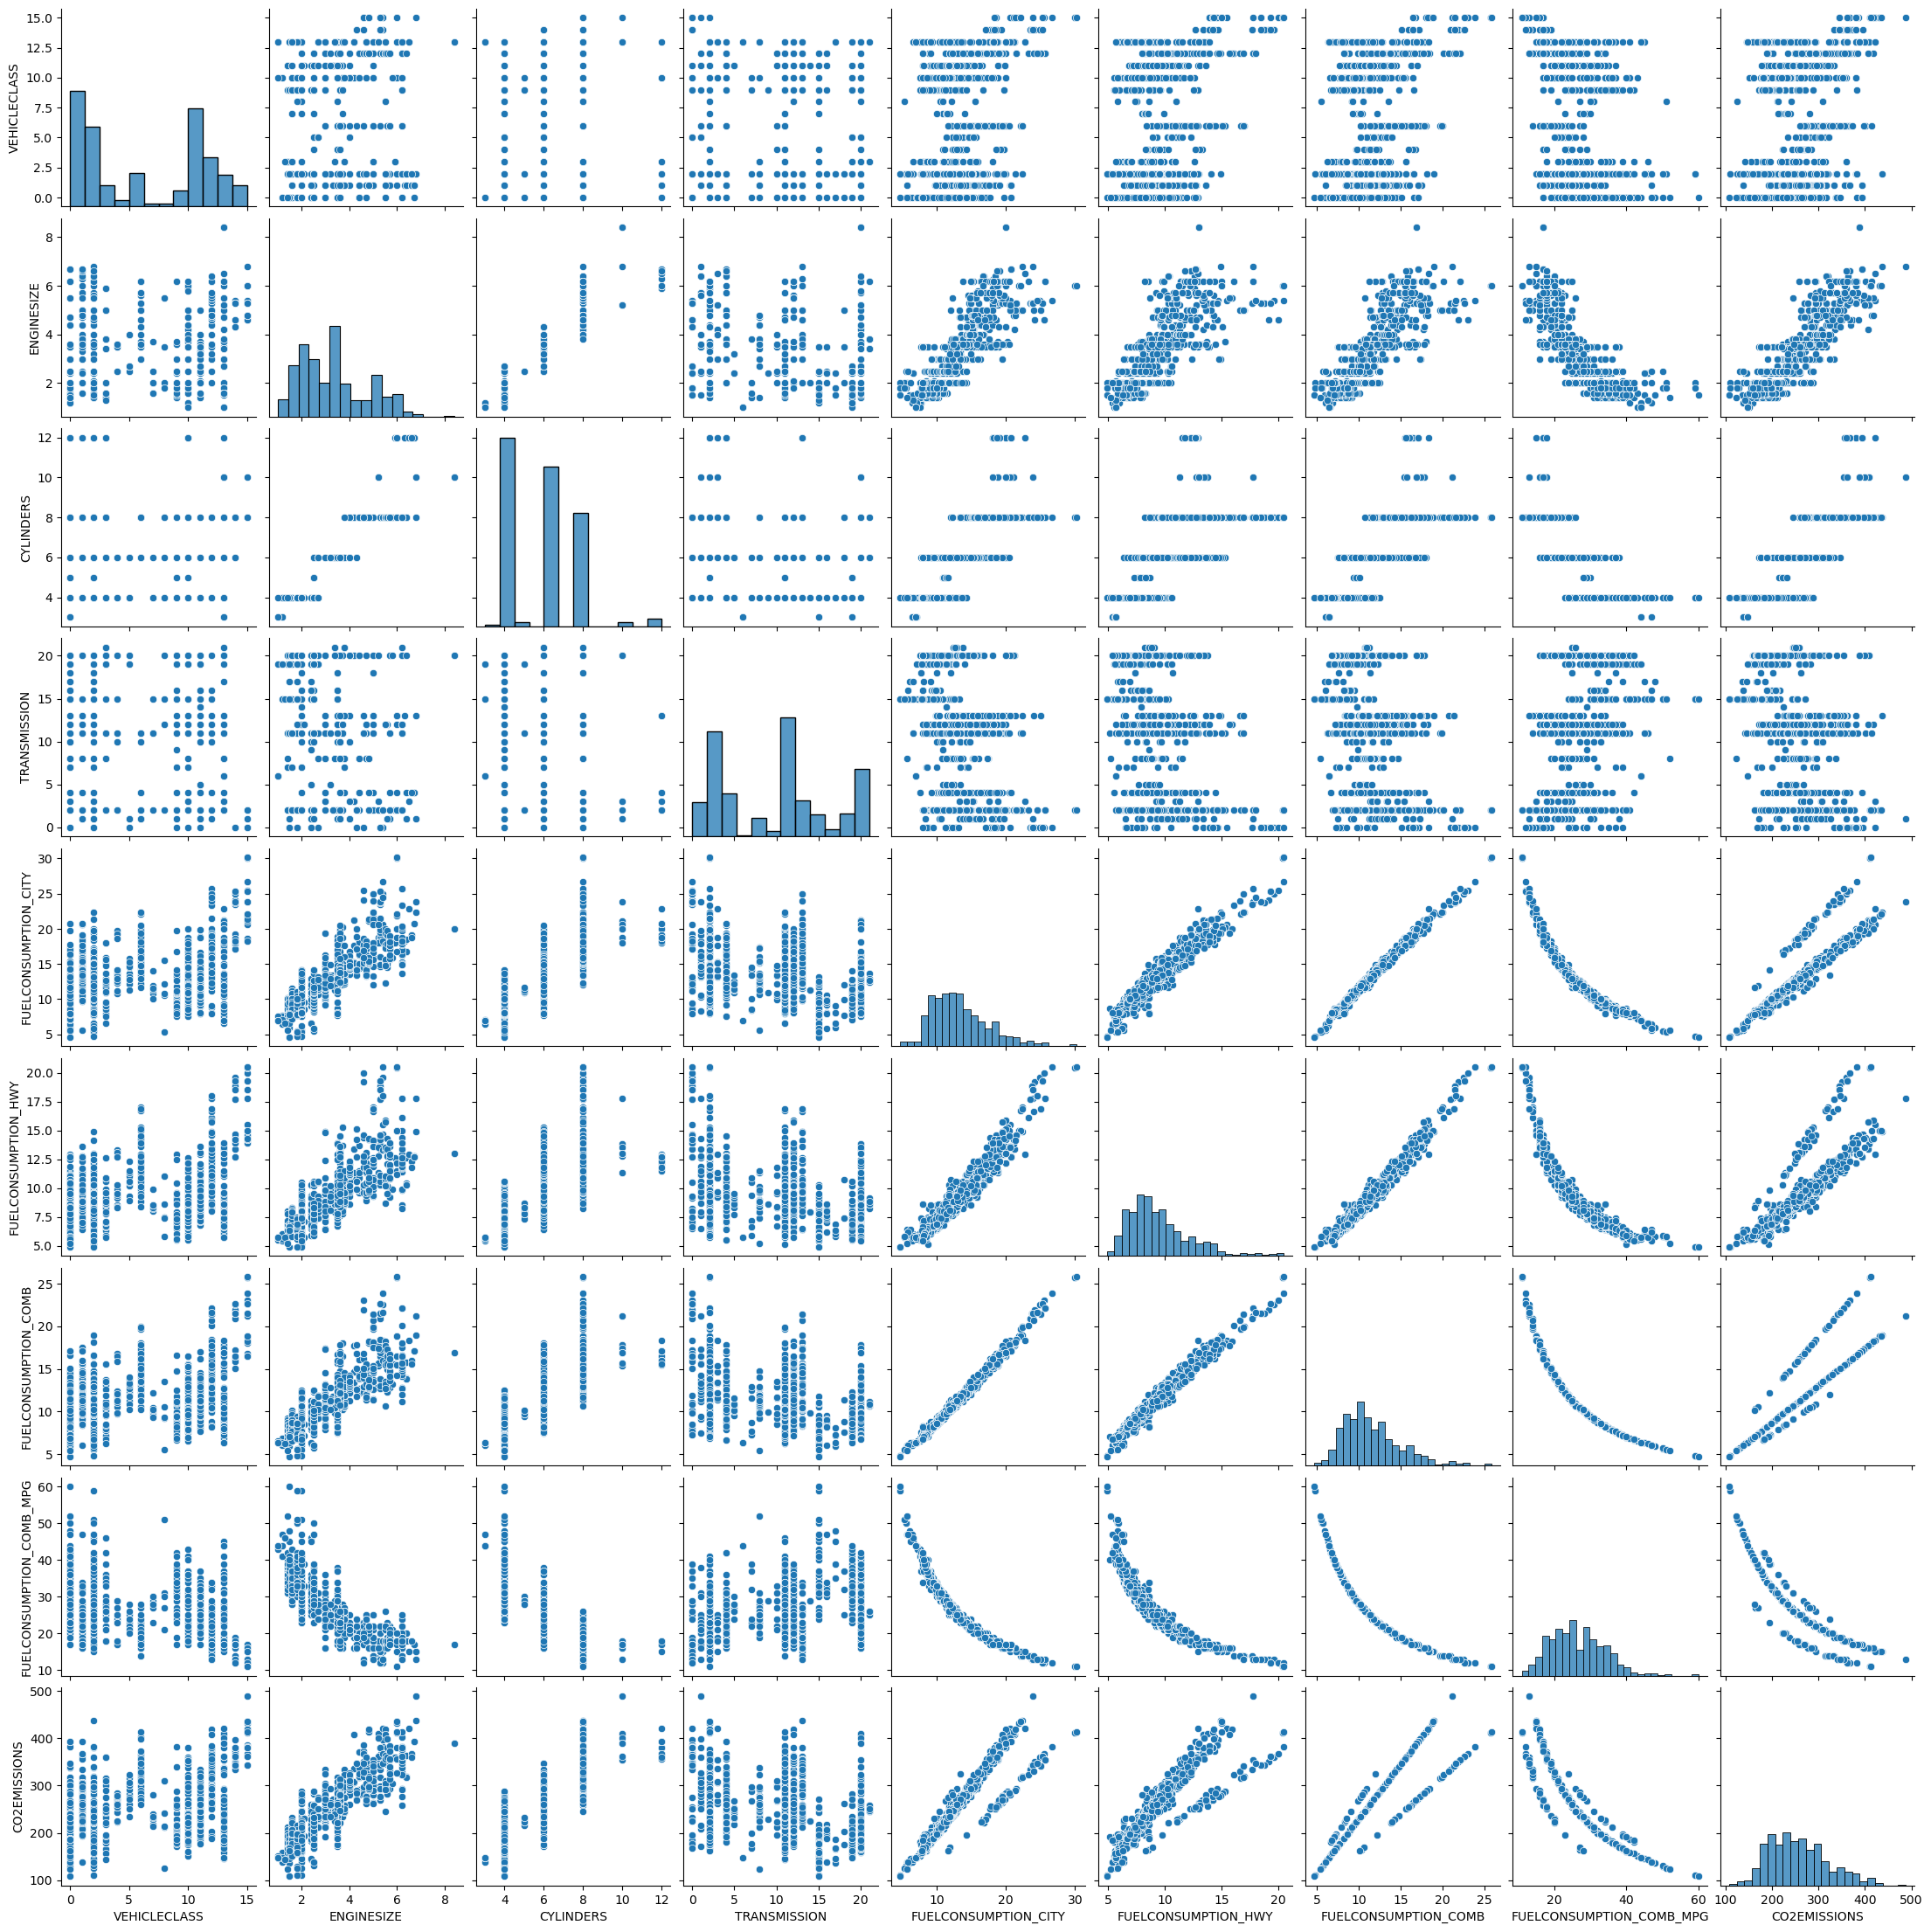

In [62]:
sns.pairplot(df1)

In [23]:
count = df['MAKE'].value_counts()

In [28]:
count

MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: count, dtype: int64

In [26]:
relp = count[count<=25].index

In [27]:
relp

Index(['HYUNDAI', 'SUBARU', 'JAGUAR', 'LEXUS', 'HONDA', 'INFINITI', 'CHRYSLER',
       'LAND ROVER', 'MITSUBISHI', 'BUICK', 'RAM', 'ACURA', 'VOLVO', 'LINCOLN',
       'FIAT', 'SCION', 'BENTLEY', 'ROLLS-ROYCE', 'ASTON MARTIN', 'MASERATI',
       'LAMBORGHINI', 'SMART', 'SRT'],
      dtype='object', name='MAKE')

In [34]:
import numpy as np

In [39]:
df2 = pd.get_dummies(df1['MAKE'].replace(relp , 'others'),dtype=np.int64)

In [40]:
df3 = pd.concat([df1,df2],axis=1)

In [41]:
df3

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,...,JEEP,KIA,MAZDA,MERCEDES-BENZ,MINI,NISSAN,PORSCHE,TOYOTA,VOLKSWAGEN,others
0,ACURA,0,2.0,4,10,Z,9.9,6.7,8.5,33,...,0,0,0,0,0,0,0,0,0,1
1,ACURA,0,2.4,4,20,Z,11.2,7.7,9.6,29,...,0,0,0,0,0,0,0,0,0,1
2,ACURA,0,1.5,4,17,Z,6.0,5.8,5.9,48,...,0,0,0,0,0,0,0,0,0,1
3,ACURA,11,3.5,6,11,Z,12.7,9.1,11.1,25,...,0,0,0,0,0,0,0,0,0,1
4,ACURA,11,3.5,6,11,Z,12.1,8.7,10.6,27,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,11,3.0,6,11,X,13.4,9.8,11.8,24,...,0,0,0,0,0,0,0,0,0,1
1063,VOLVO,11,3.2,6,11,X,13.2,9.5,11.5,25,...,0,0,0,0,0,0,0,0,0,1
1064,VOLVO,11,3.0,6,11,X,13.4,9.8,11.8,24,...,0,0,0,0,0,0,0,0,0,1
1065,VOLVO,11,3.2,6,11,X,12.9,9.3,11.3,25,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df4 = df3.drop(['MAKE'],axis=1)

In [43]:
df4

,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,...,JEEP,KIA,MAZDA,MERCEDES-BENZ,MINI,NISSAN,PORSCHE,TOYOTA,VOLKSWAGEN,others
0,0,2.0,4,10,Z,9.9,6.7,8.5,33,196,...,0,0,0,0,0,0,0,0,0,1
1,0,2.4,4,20,Z,11.2,7.7,9.6,29,221,...,0,0,0,0,0,0,0,0,0,1
2,0,1.5,4,17,Z,6.0,5.8,5.9,48,136,...,0,0,0,0,0,0,0,0,0,1
3,11,3.5,6,11,Z,12.7,9.1,11.1,25,255,...,0,0,0,0,0,0,0,0,0,1
4,11,3.5,6,11,Z,12.1,8.7,10.6,27,244,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,11,3.0,6,11,X,13.4,9.8,11.8,24,271,...,0,0,0,0,0,0,0,0,0,1
1063,11,3.2,6,11,X,13.2,9.5,11.5,25,264,...,0,0,0,0,0,0,0,0,0,1
1064,11,3.0,6,11,X,13.4,9.8,11.8,24,271,...,0,0,0,0,0,0,0,0,0,1
1065,11,3.2,6,11,X,12.9,9.3,11.3,25,260,...,0,0,0,0,0,0,0,0,0,1


In [44]:
oe = OrdinalEncoder(categories=[['D','E','X','Z']])  

In [45]:
v = df4['FUELTYPE'].values

In [46]:
oe.fit(v.reshape(-1,1))

,categories,"[['D', 'E', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [47]:
df4[['FUELTYPE']] = oe.transform(df4[['FUELTYPE']])

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


In [48]:
df4

,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,...,JEEP,KIA,MAZDA,MERCEDES-BENZ,MINI,NISSAN,PORSCHE,TOYOTA,VOLKSWAGEN,others
0,0,2.0,4,10,3.0,9.9,6.7,8.5,33,196,...,0,0,0,0,0,0,0,0,0,1
1,0,2.4,4,20,3.0,11.2,7.7,9.6,29,221,...,0,0,0,0,0,0,0,0,0,1
2,0,1.5,4,17,3.0,6.0,5.8,5.9,48,136,...,0,0,0,0,0,0,0,0,0,1
3,11,3.5,6,11,3.0,12.7,9.1,11.1,25,255,...,0,0,0,0,0,0,0,0,0,1
4,11,3.5,6,11,3.0,12.1,8.7,10.6,27,244,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,11,3.0,6,11,2.0,13.4,9.8,11.8,24,271,...,0,0,0,0,0,0,0,0,0,1
1063,11,3.2,6,11,2.0,13.2,9.5,11.5,25,264,...,0,0,0,0,0,0,0,0,0,1
1064,11,3.0,6,11,2.0,13.4,9.8,11.8,24,271,...,0,0,0,0,0,0,0,0,0,1
1065,11,3.2,6,11,2.0,12.9,9.3,11.3,25,260,...,0,0,0,0,0,0,0,0,0,1


In [49]:
x = df4.drop(['CO2EMISSIONS'],axis=1)

In [50]:
y = df4['CO2EMISSIONS']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [ ]:
## ENGINESIZE,CYLINDERS , FUELCONSUMPTION_CITY , FUELCONSUMPTION_HWY , FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG

In [58]:
col = ['ENGINESIZE','CYLINDERS' , 'FUELCONSUMPTION_CITY' , 'FUELCONSUMPTION_HWY' , 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']

In [59]:
x_train[col] = scaler.fit_transform(x_train[col])
x_test[col] = scaler.transform(x_test[col])

In [60]:
x_train.head()

,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,AUDI,...,JEEP,KIA,MAZDA,MERCEDES-BENZ,MINI,NISSAN,PORSCHE,TOYOTA,VOLKSWAGEN,others
518,11,-0.952651,-1.000814,20,2.0,-0.466650,-0.317665,-0.429140,0.212662,0,...,0,0,0,0,0,0,0,0,0,1
178,9,2.012827,1.232526,20,3.0,0.829141,1.082409,0.923641,-0.990439,0,...,0,0,0,0,0,0,0,0,0,0
460,6,1.377367,1.232526,2,2.0,0.389061,0.400322,0.405554,-0.589405,0,...,0,0,0,0,0,0,0,0,0,0
525,0,-1.235078,-1.000814,20,2.0,-0.882281,-0.856155,-0.889662,0.881052,0,...,0,0,0,0,0,0,0,0,0,1
782,3,-1.235078,-1.000814,2,3.0,-1.126770,-1.035652,-1.091140,1.282086,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
y_pred = lr.predict(x_test)

In [68]:
from sklearn.metrics import r2_score , mean_absolute_error

In [69]:
r2_score(y_test,y_pred)

0.9087902093770457

In [70]:
mean_absolute_error(y_test,y_pred)

14.033752809946698